In [489]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split


In [490]:
df=pd.read_csv('titanic.csv')

In [491]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [492]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

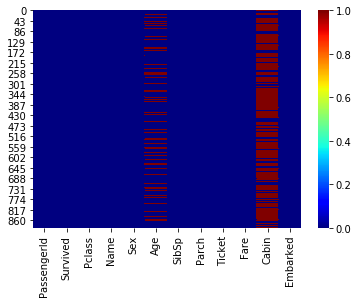

In [493]:
sns.heatmap(df.isnull(), cmap='jet', cbar=True)   # 'cbar' for colorbar, 'cmap' for colormap.

In [494]:
df.drop(['Name','Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [495]:
sex=pd.get_dummies(df['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [496]:
embarked=pd.get_dummies(df['Embarked'],drop_first=True)
embarked


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [497]:
pclass=pd.get_dummies(df['Pclass'], drop_first=True)
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [498]:
df1=pd.concat([df,sex, pclass, embarked], axis=1)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,2,3,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,S,0,0,0,0,1
888,0,3,female,NaN,1,2,23.4500,S,0,0,1,0,1
889,1,1,male,26.0,0,0,30.0000,C,1,0,0,0,0


In [499]:
df2=df1.drop(['Sex', 'Embarked', 'Pclass'], axis=1)
df2

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1
888,0,NaN,1,2,23.4500,0,0,1,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,0


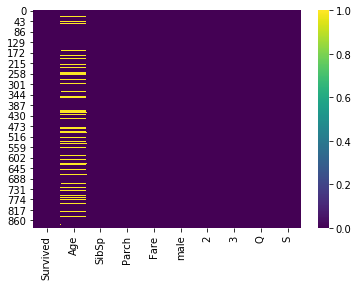

In [500]:
sns.heatmap(df2.isnull(), cmap='viridis', cbar=True)

In [501]:
df2.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
male          0
2             0
3             0
Q             0
S             0
dtype: int64

In [502]:
age=df2['Age'].median()
age

28.0

In [503]:
df3=df2.fillna(age)
df3

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1
888,0,28.0,1,2,23.4500,0,0,1,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,0


In [504]:
df3.isnull().sum()

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
2           0
3           0
Q           0
S           0
dtype: int64

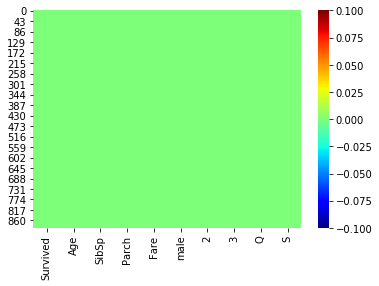

In [505]:
sns.heatmap(df3.isnull(), cmap='jet', cbar=True)   # 'cbar' for colorbar, 'cmap' for colormap.

In [506]:
'''Now, the whole data has been cleaned.
Lets create a ML model by spliting data into train and test parts.'''

'Now, the whole data has been cleaned.\nLets create a ML model by spliting data into train and test parts.'

In [507]:
X=df3.drop('Survived', axis=1)
y=df3['Survived']

In [508]:
from sklearn.model_selection import train_test_split

In [509]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=1)

In [510]:
# now, just train the data using  fit()
from sklearn.linear_model import LogisticRegression


In [511]:
logmodel=LogisticRegression()   # create an instance of that model

In [512]:
logmodel.fit(X_train, y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [513]:
# now, data has been trained, now predict.
predict=logmodel.predict(X_test)

In [514]:
#Now, checking the accuracy of the model built,  -> 2 metrics

#1. classificationreport()
#2. accuracy()


In [515]:
#import the report()
from sklearn.metrics import classification_report

In [516]:
classification_report(y_test, predict)

'              precision    recall  f1-score   support\n\n           0       0.81      0.88      0.84       106\n           1       0.80      0.70      0.74        73\n\n    accuracy                           0.80       179\n   macro avg       0.80      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'

In [518]:
#2.  confusion metrics 
#import the report()
from sklearn.metrics import confusion_matrix

In [519]:
confusion_matrix(y_test, predict)

array([[93, 13],
       [22, 51]], dtype=int64)

In [520]:
# finally, let's generate accuracy score using accuracy_score()
from sklearn.metrics import accuracy_score

In [521]:
accuracy_score(y_test, predict)

0.8044692737430168

In [ ]:
# now, we can see our model accuracy is 80% , can say .... better!!